# （1）产品的不同价格对需求量的影响  


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# 读取数据
df = pd.read_csv('data/order_train1.csv')
#数据预处理
#可以得出数据没有缺失值

# 查看数据的基本信息
print(df.info())

# 查看数据的统计量
print(df.describe())

#查看是否有重复值
print('查看是否有重复值')
duplicated=df.duplicated()
print(df.duplicated().sum())
print(df[duplicated])

#删除重复值
df = df.drop_duplicates()
print(df.duplicated().sum())


#保存处理后的结果
df.to_csv('data/order_train2.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597694 entries, 0 to 597693
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_date         597694 non-null  object 
 1   sales_region_code  597694 non-null  int64  
 2   item_code          597694 non-null  int64  
 3   first_cate_code    597694 non-null  int64  
 4   second_cate_code   597694 non-null  int64  
 5   sales_chan_name    597694 non-null  object 
 6   item_price         597694 non-null  float64
 7   ord_qty            597694 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 36.5+ MB
None
       sales_region_code      item_code  first_cate_code  second_cate_code  \
count      597694.000000  597694.000000    597694.000000     597694.000000   
mean          102.903949   21008.015983       304.932094        406.457174   
std             1.504880     590.896347         2.004195          3.107329   
min           101.00

In [11]:
df = pd.read_csv('data/order_train2.csv')
# 按照产品价格分组，并计算平均值
grouped = df.groupby('item_price')['ord_qty'].mean().reset_index()

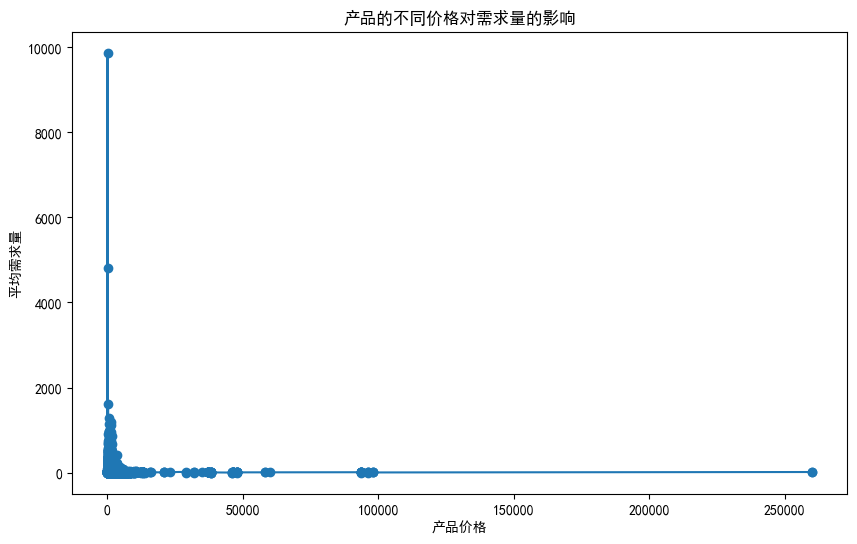

In [23]:
# 使用 Matplotlib 画图
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
plt.figure(figsize=(10, 6))
#折线图
plt.plot(grouped['item_price'], grouped['ord_qty'], 'o-')
plt.xlabel('产品价格')
plt.ylabel('平均需求量')
plt.title('产品的不同价格对需求量的影响')
plt.savefig('img/1.1.png',dpi=300)

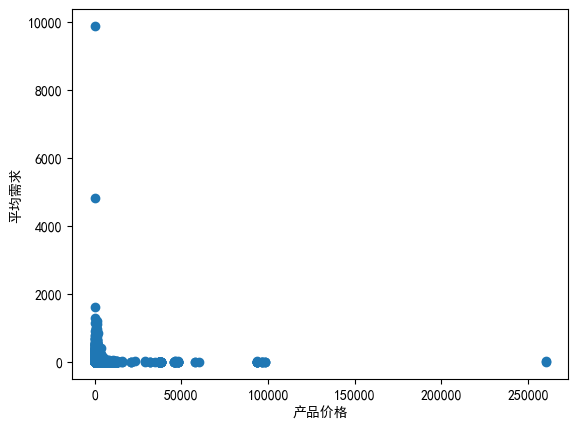

In [14]:
#绘制散点图
plt.scatter(grouped["item_price"], grouped["ord_qty"])
plt.xlabel("产品价格")
plt.ylabel("平均需求")
plt.savefig('img/1.2.png',dpi=300)
#从图中可以发现，产品价格对需求量具有一定的影响，但是并不是线性关系。

   first_cate_code    item_price   ord_qty
0              301  1.823016e+07   1586723
1              302  1.258312e+08   6221334
2              303  1.353753e+08   3748025
3              304  1.724239e+07    618444
4              305  5.526896e+07   6324256
5              306  1.916399e+08  24548437
6              307  2.991712e+07   5728696
7              308  6.936258e+07   5994397


Text(0.5, 1.0, '不同产品的销售价格和需求量之间的相关性')

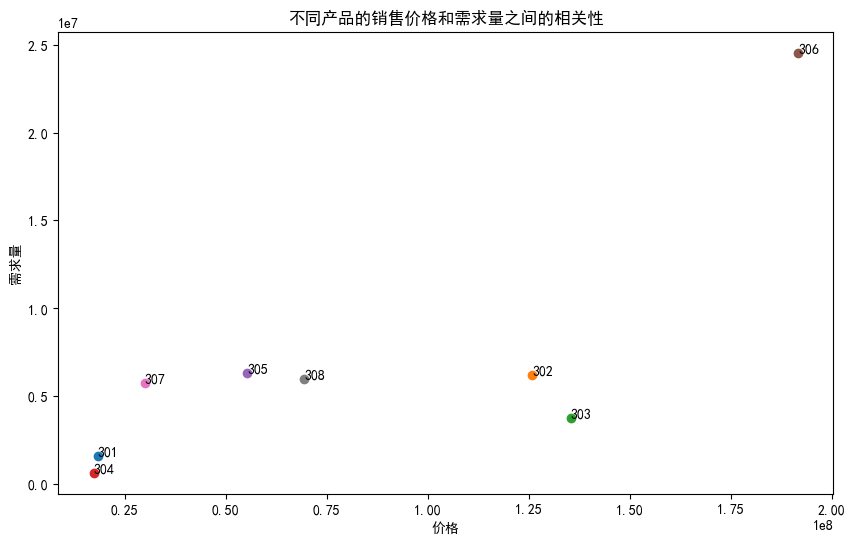

In [114]:
# 按照产品细类编码分组，并计算平格和需求量
grouped = df.groupby('first_cate_code').agg({'item_price': 'sum', 'ord_qty': 'sum'})
grouped = grouped.reset_index() # 重置索引，以方便后续操作
print(grouped)
# 生成散点图
fig, ax = plt.subplots(figsize=(10, 6))

# 添加每个数据点的标签
for i, row in grouped.iterrows():
    ax.scatter(row['item_price'], row['ord_qty'])
    ax.annotate(str(row['first_cate_code']).split('.')[0], (row['item_price'], row['ord_qty']))
ax.set_xlabel('价格')
ax.set_ylabel('需求量')
ax.set_title('不同产品的销售价格和需求量之间的相关性')


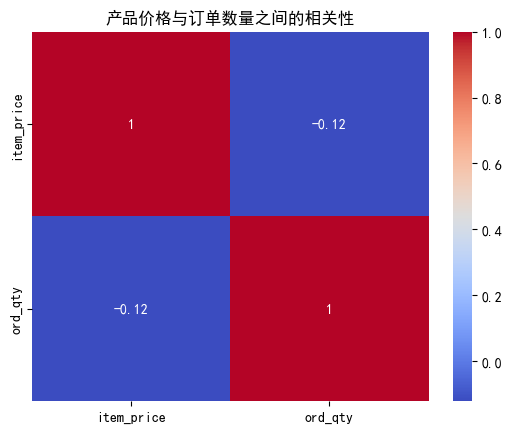

In [26]:
# 计算产品价格与需求量的相关性
corr = df[['item_price', 'ord_qty']].corr()

# 绘制相关性热力图
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('产品价格与订单数量之间的相关性')
plt.savefig('img/1.3.png',dpi=300)

#热力图中可以看出，产品价格与需求量的相关性很低，为-0.12， 基本上没有相关性 ，因此可以认为二者之间的关系并不强。

#产品价格对需求量影响较小，但不同的价格仍然可能对应不同的需求量水平。

# （2）产品所在区域对需求量的影响，以及不同区域的产品需求量有何特性

sales_region_code
101    12400949
102    13966622
103    11519878
104     2387342
105    14495521
Name: ord_qty, dtype: int64


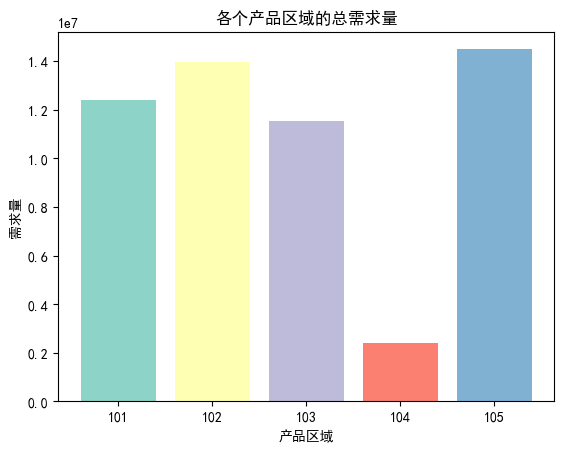

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from matplotlib import cm
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
# 读取数据  已经处理好的数据。
df = pd.read_csv('data/order_train2.csv')
# 根据区域分组，并计算每个区域的总需求量
region_demand = df.groupby("sales_region_code")["ord_qty"].sum()

# 使用颜色映射创建颜色列表
cmap = cm.get_cmap('Set3')
colors = [cmap(i) for i in range(len(region_demand))]


print(region_demand)
# 绘制柱状图展示每个区域的平均需求量
plt.bar(region_demand.index, region_demand.values,color=colors )
plt.xlabel('产品区域')
plt.ylabel('需求量')
plt.title('各个产品区域的总需求量')
plt.savefig('img/2.1.png',dpi=300) 


Text(0.5, 1.0, '各个产品区域的总销售额')

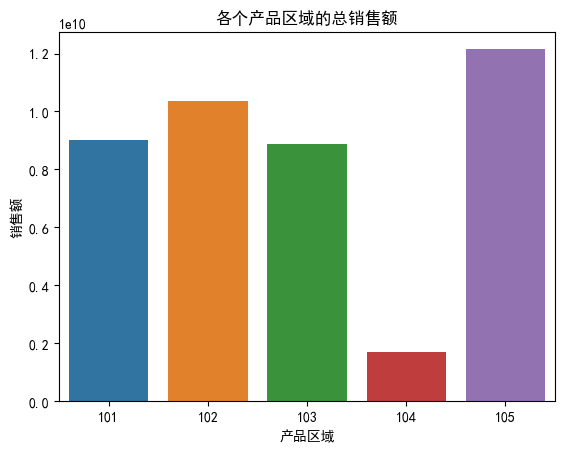

In [151]:
df['sales_amount'] = df['item_price'] * df['ord_qty']
df_sales = df.groupby(['order_date', 'sales_region_code', 'first_cate_code']).agg({'ord_qty': 'sum', 'sales_amount': 'sum'}).reset_index()

# 不同区域的销售量和销售额
df_region = df_sales.groupby('sales_region_code').agg({'ord_qty': 'sum', 'sales_amount': 'sum'}).reset_index()
sns.barplot(x='sales_region_code', y='sales_amount', data=df_region)
plt.xlabel('产品区域')
plt.ylabel('销售额')
plt.title('各个产品区域的总销售额')


Text(0, 0.5, '需求量')

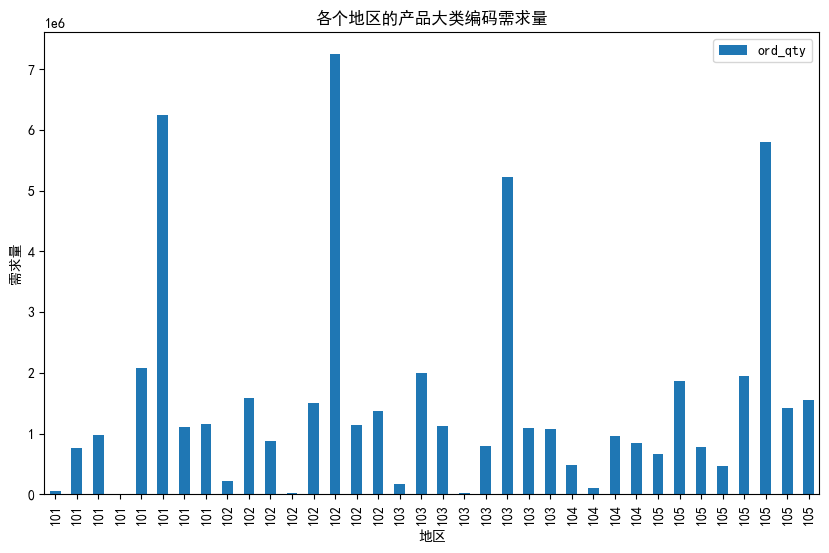

In [70]:
# 对销售区域和产品大类进行分组，并计算需求量的
grouped = df.groupby(['sales_region_code', 'first_cate_code'])['ord_qty'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
# 使用pandas的plot方法绘制柱状图
grouped.plot(ax=ax, x='sales_region_code', y='ord_qty', kind='bar')
ax.set_title('各个地区的产品大类编码需求量')
ax.set_xlabel('地区')
ax.set_ylabel('需求量')


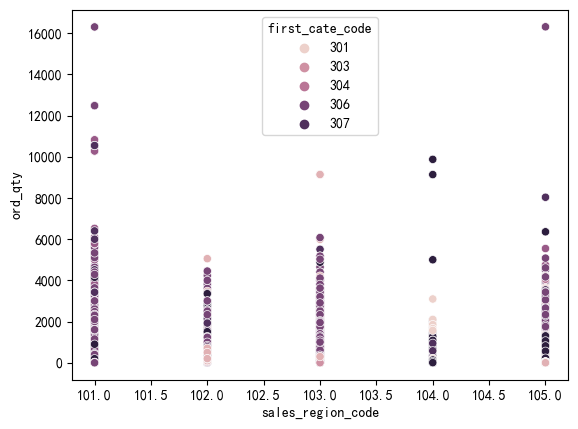

In [79]:
#使用散点图探索不同产品大类和产品需求量 在不同地区之间的关系
df = pd.read_csv('data/order_train2.csv')
sns.scatterplot(x='sales_region_code', y='ord_qty', hue='first_cate_code', data=df)
plt.show()

In [61]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f_oneway
from scipy.stats import normaltest
import pandas as pd
import scipy.stats as stats
import numpy as np
from scipy.stats import wilcoxon
# 读取数据  已经处理好的数据。
data = pd.read_csv('data/order_train2.csv')

#进行方差分析之前，我们需要对数据进行正态性检验。如果数据不符合正态分布，可以考虑使用非参数方法进行分析，例如 Kruskal-Wallis 检验
# 选取需要的列
data = data[['sales_region_code', 'ord_qty']]

# 将不同区域的需求量分别存储在列表中
region1 = data.loc[data['sales_region_code'] == 101]['ord_qty']
region2 = data.loc[data['sales_region_code'] == 102]['ord_qty']
region3 = data.loc[data['sales_region_code'] == 103]['ord_qty']
region4 = data.loc[data['sales_region_code'] == 104]['ord_qty']
region5 = data.loc[data['sales_region_code'] == 105]['ord_qty']
print(region1.head())
#打印他们的长度
print(region1.shape[0])
print(region2.shape[0])
print(region3.shape[0])
print(region4.shape[0])
print(region5.shape[0])
      

# 进行正态性检验并输出结果
# 根据p值和显著性水平进行判断
#alpha = 0.05
#if p_value < alpha:
 #   print("数据不符合正态分布")
#else:
 #   print("数据符合正态分布")
    
stat1, p_value1 = normaltest(region1)
stat2, p_value2 = normaltest(region2)
stat3, p_value3 = normaltest(region3)
stat4, p_value4 = normaltest(region4)
stat5, p_value5 = normaltest(region5)
print('Region 1:', 'stat =', stat1, 'p-value =', p_value1)
print('Region 2:', 'stat =', stat2, 'p-value =', p_value2)
print('Region 3:', 'stat =', stat3, 'p-value =', p_value3)
print('Region 4:', 'stat =', stat4, 'p-value =', p_value4)
print('Region 5:', 'stat =', stat5, 'p-value =', p_value5)

#结果发现，五组数据都不服正态性，需要进行处理，让数据正态化。

38    49
39    12
40     7
41    45
42    33
Name: ord_qty, dtype: int64
109935
144538
101420
23096
151628
Region 1: stat = 29536.380019842603 p-value = 0.0
Region 2: stat = 37406.52669018368 p-value = 0.0
Region 3: stat = 27905.541689475103 p-value = 0.0
Region 4: stat = 6464.26526345568 p-value = 0.0
Region 5: stat = 58779.19010233969 p-value = 0.0


In [60]:
region1 = data.loc[data['sales_region_code'] == 101]['ord_qty'].sample(n=50)
region2 = data.loc[data['sales_region_code'] == 102]['ord_qty'].sample(n=50)
region3 = data.loc[data['sales_region_code'] == 103]['ord_qty'].sample(n=50)
region4 = data.loc[data['sales_region_code'] == 104]['ord_qty'].sample(n=50)
region5 = data.loc[data['sales_region_code'] == 105]['ord_qty'].sample(n=100)

#使数据趋于正态。
region1_log = np.sqrt(region1)
region2_log = np.sqrt(region2)
region3_log = np.sqrt(region3)
region4_log = np.sqrt(region4)
region5_log = np.sqrt(region5)

# 进行正态性检验并输出结果
stat1, p_value1 = normaltest(region1_log)
stat2, p_value2 = normaltest(region2_log)
stat3, p_value3 = normaltest(region3_log)
stat4, p_value4 = normaltest(region4_log)
stat5, p_value5 = normaltest(region5_log)
print('Region 1:', 'stat =', stat1, 'p-value =', p_value1)
print('Region 2:', 'stat =', stat2, 'p-value =', p_value2)
print('Region 3:', 'stat =', stat3, 'p-value =', p_value3)
print('Region 4:', 'stat =', stat4, 'p-value =', p_value4)
print('Region 5:', 'stat =', stat5, 'p-value =', p_value5)


Region 1: stat = 6.240070874934477 p-value = 0.044155603629209915
Region 2: stat = 5.58762531290859 p-value = 0.06118748178063607
Region 3: stat = 8.85014570422003 p-value = 0.01197333898601997
Region 4: stat = 4.935237661435745 p-value = 0.08478650985668383
Region 5: stat = 23.67051495897705 p-value = 7.244576199479683e-06


例子：
确定临界值的选择需要考虑显著性水平和自由度。显著性水平是研究人员事先决定的，通常设为0.05或0.01。自由度是根据样本的大小和组数计算得出的。

对于在实验研究中常用的两种ANOVA设计：单因素（one-way ANOVA）和双因素（two-way ANOVA），其自由度和临界值的选择有所不同：

单因素（one-way）ANOVA：当只有一个因素影响结果时，自由度为组数减一。在确定临界值时，需要考虑显著性水平和自由度。例如，对于显著性水平为0.05、组数为3的单因素ANOVA，F临界值为3.00。如果计算得到的F值大于3.00，就可以拒绝原假设。
双因素（two-way）ANOVA：当有两个因素影响结果时，自由度分别计算。例如，如果有两个因素，因素1有3个水平，因素2有4个水平，样本大小为20个（每个水平下有5个样本），则自由度分别为2和15。根据不同的显著性水平和自由度，可以在F分布表中查找对应的临界值。例如，当显著性水平为0.05时，在自由度为（2，15）的F分布表中，F临界值为3.19。
需要注意的是，临界值只是参考值，只有当实际计算的F值大于临界值时才能拒绝原假设。

In [10]:
# 进行ANOVA方差分析

# 计算自由度  这里是单因素 假设只有区域影响需求量
df_between = 4
df_within = region1.shape[0] + region2.shape[0]+ region3.shape[0] + region4.shape[0] + region5.shape[0]

# 计算临界值
alpha = 0.05
f_critical = stats.f.ppf(q=1-alpha, dfn=df_between, dfd=df_within)

#方差来源、自由度、均方、F值和p值等信息 通过p值来判断是否存在显著性差异 如果p值小于0.05，则表示差异具有统计学显著性

f_value, p_value = f_oneway(region1, region2, region3, region4,region5)
print('F-value:', f_value)
print('p-value:', p_value)
print("F临界值: ", f_critical)

F-value: 789.3970831673851
p-value: 0.0
F临界值:  2.371948994691576


# （3）不同销售方式（线上和线下）的产品需求量的特性  


In [81]:
import pandas as pd

plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

# 读取数据
data = pd.read_csv('data/order_train2.csv')

# 查看数据
print(data.head())

# 提取线上和线下订单需求量
online_ord_qty = data[data["sales_chan_name"] == "online"]["ord_qty"]
offline_ord_qty = data[data["sales_chan_name"] == "offline"]["ord_qty"]

# 将数据按照销售渠道名称分为线上和线下两类
online_data = data[data['sales_chan_name'] == 'online']
offline_data = data[data['sales_chan_name'] == 'offline']

# 计算线上和线下订单需求量的基本统计量
print('线上订单需求量的基本统计量：')
print(online_data['ord_qty'].describe())

print('线下订单需求量的基本统计量：')
print(offline_data['ord_qty'].describe())


   order_date  sales_region_code  item_code  first_cate_code  \
0  2015-09-01                104      22069              307   
1  2015-09-01                104      20028              301   
2  2015-09-02                104      21183              307   
3  2015-09-02                104      20448              308   
4  2015-09-02                104      21565              307   

   second_cate_code sales_chan_name  item_price  ord_qty  
0               403         offline      1114.0       19  
1               405         offline      1012.0       12  
2               403          online       428.0      109  
3               404          online       962.0        3  
4               403         offline      1400.0        3  
线上订单需求量的基本统计量：
count    158212.000000
mean        112.531951
std         234.375168
min           1.000000
25%          12.000000
50%          37.000000
75%         108.000000
max       16308.000000
Name: ord_qty, dtype: float64
线下订单需求量的基本统计量：
count    439170.0

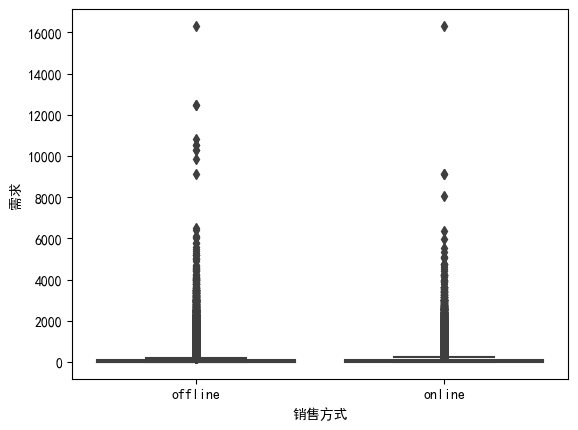

In [82]:
import seaborn as sns
# 绘制箱线图，分析线上和线下订单需求量的分布情况
sns.boxplot(x="sales_chan_name", y="ord_qty", data=data)
plt.xlabel('销售方式')
plt.ylabel('需求')
plt.savefig('img/3.1.png',dpi=300)

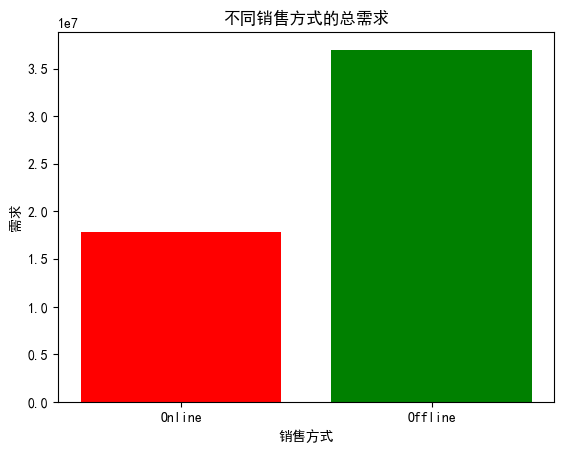

In [95]:
import matplotlib.pyplot as plt

# 绘制线上和线下订单需求量直方图
X = [sum(online_ord_qty), sum(offline_ord_qty)]
labels = ['Online', 'Offline']
plt.bar(labels, X,color = ['red','green'])
plt.xlabel('销售方式')
plt.ylabel('需求')
plt.title('不同销售方式的总需求')
plt.savefig('img/3.2.png',dpi=300)

C:\Users\15119936719\AppData\Local\Temp\ipykernel_6208\65734281.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(online_ord_qty, shade=True, label="Online")
C:\Users\15119936719\AppData\Local\Temp\ipykernel_6208\65734281.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(offline_ord_qty, shade=True, label="Offline")


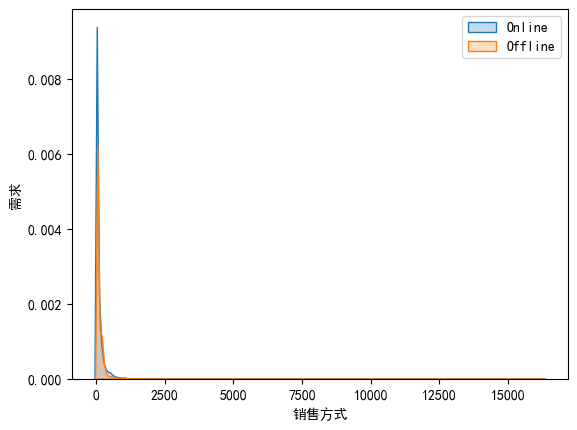

In [85]:
import seaborn as sns

# 绘制线上和线下订单需求量核密度图
sns.kdeplot(online_ord_qty, shade=True, label="Online")
sns.kdeplot(offline_ord_qty, shade=True, label="Offline")
plt.legend(loc="upper right")
plt.xlabel('销售方式')
plt.ylabel('需求')
plt.savefig('img/3.3.png',dpi=300)

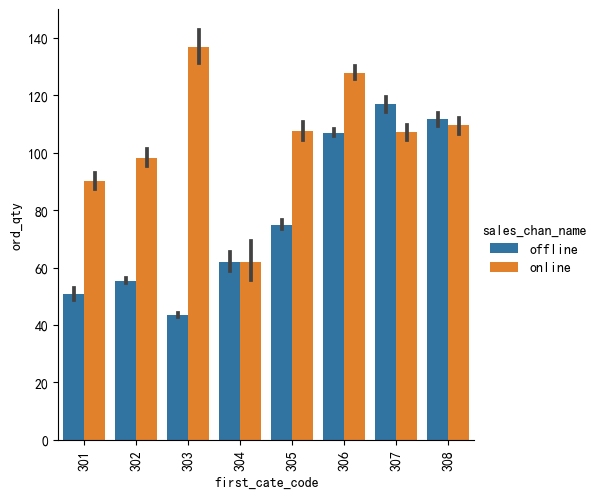

In [88]:
# 抽取大类编码列和销售渠道名称列作为分组变量
g = sns.catplot(x='first_cate_code', y='ord_qty', hue='sales_chan_name', data=df, kind='bar')
# X轴标签旋转90度以避免重叠
g.set_xticklabels(rotation=90)
# 图片显示
plt.show()

# （4）不同品类之间的产品需求量有何不同点和共同点；   

                      sum  median         std
first_cate_code                              
301               1586723    28.0  142.801891
302               6221334    23.0  148.228589
303               3748025    19.0  119.819467
304                618444    19.0  153.823758
305               6324256    28.0  199.282473
306              24548437    36.0  232.441546
307               5728696    41.0  228.258122
308               5994397    41.0  204.942447


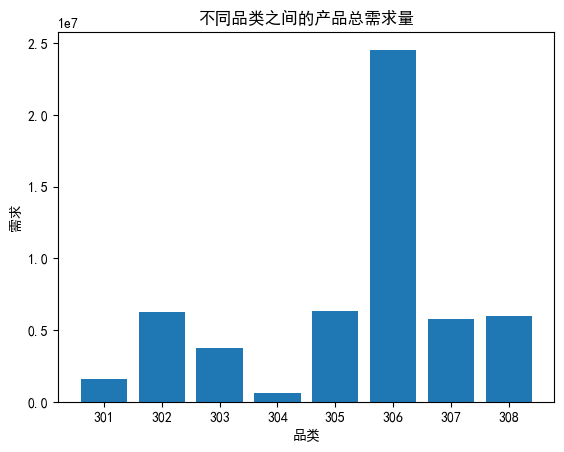

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('data/order_train2.csv')

# 按照品类分组，计算每个品类的订单需求量的平均值、中位数、标准差等统计指标
category_demand = data.groupby('first_cate_code')['ord_qty'].agg(['sum', 'median', 'std'])

# 绘制柱状图展示每个品类的平均需求量
print(category_demand)
plt.bar(category_demand.index, category_demand['sum'])
plt.title("不同品类之间的产品总需求量")
plt.xlabel("品类")
plt.ylabel("需求")
plt.savefig('img/4.1.png',dpi=300)


Text(0.5, 1.0, '不同品类的销售额')

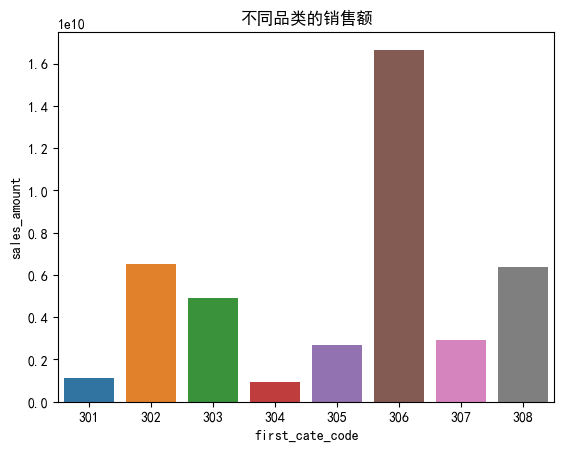

In [148]:
#同品类的销售量和销售额
data['sales_amount'] = data['item_price'] * data['ord_qty']
sns.barplot(x='first_cate_code', y='sales_amount', data=df_cate)
plt.title('不同品类的销售额')

Text(0, 0.5, '需求')

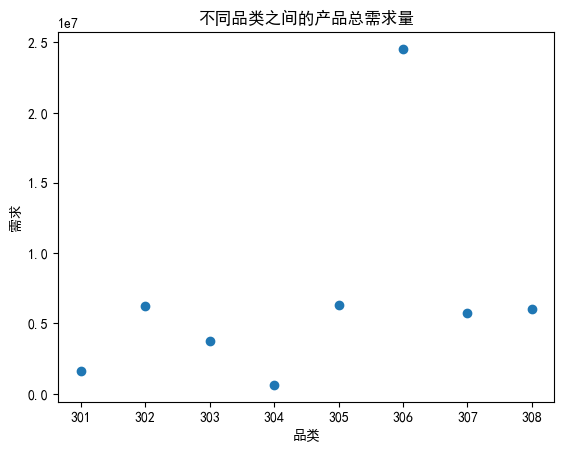

In [123]:
# 按照产品大类分组求和
grouped = df.groupby(['first_cate_code'])['ord_qty'].sum()

# 绘制散点图
plt.scatter(grouped.index, grouped.values)

# 设置图表标题和坐标轴标签
plt.title("不同品类之间的产品总需求量")
plt.xlabel("品类")
plt.ylabel("需求")

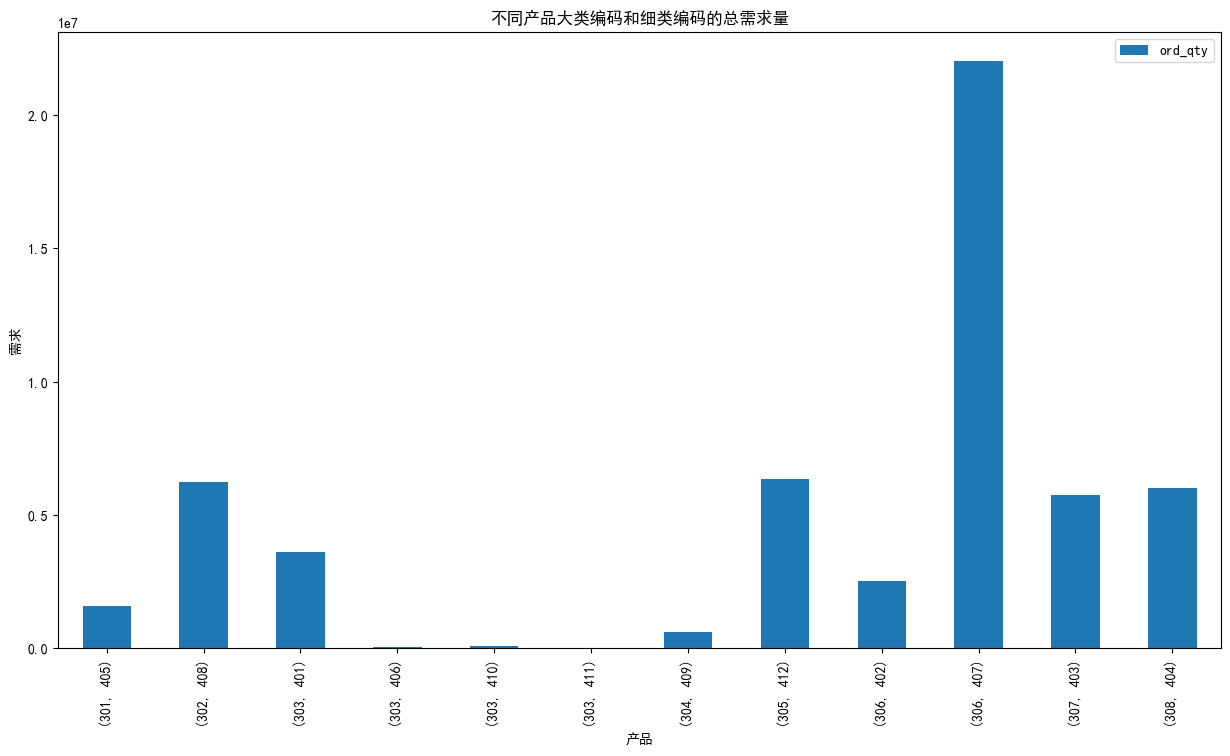

In [121]:
# 计算产品大类编码和细类编码对需求量
agg_df = df.pivot_table(values='ord_qty', index=['first_cate_code', 'second_cate_code'], aggfunc='sum')
# 将数据可视化展示为柱状图
agg_df.plot(kind='bar', figsize=(15, 8))
plt.title('不同产品大类编码和细类编码的总需求量')
plt.xlabel('产品')
plt.ylabel('需求')
plt.show()

Text(0.5, 1.0, '不同产品的在不同销售渠道的需求量')

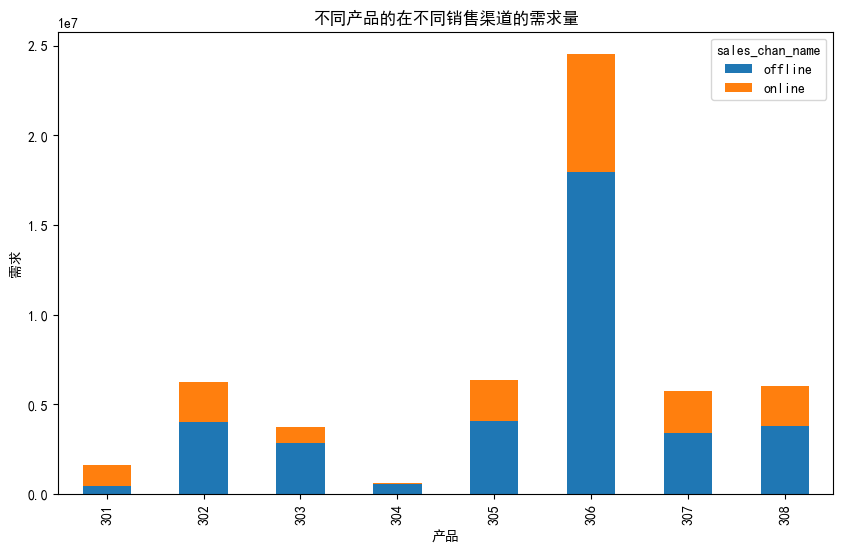

In [102]:
# 按照产品细类编码和销售渠道名称分组，并计算需求量
grouped = data.groupby(['first_cate_code', 'sales_chan_name'])['ord_qty'].sum().unstack()

# 我们可以使用堆积柱状图（stacked column chart）来展示每个产品细类在两种销售渠道（线上/线下）下的需求量。
fig, ax = plt.subplots(figsize=(10, 6))
grouped.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('需求')
ax.set_xlabel('产品')
ax.set_title('不同产品的在不同销售渠道的需求量')


In [26]:
# 对于不同品类之间的需求量进行比较分析，找出不同品类之间的不同点和共同点
# 可以使用t检验、方差分析等 统计方法
#这里使用t检验   我们假设三个组的方差不相等

data_d = data.groupby('second_cate_code')['ord_qty']
group1 = list(data_d.get_group(401))
group2 = list(data_d.get_group(402))
group3 = list(data_d.get_group(404))

t, p = stats.ttest_ind(group1, group2)
print("t-value = " + str(t))
print("p-value = " + str(p))

t1, p1 = stats.ttest_ind(group1, group3)
print("t1-value = " + str(t1))
print("p1-value = " + str(p1))

t2, p2 = stats.ttest_ind(group2, group3)
print("t2-value = " + str(t2))
print("p2-value = " + str(p2))
# p 值非常小，小于显著性水平 0.05  说明不同品类的需求量是有一定差异的

t-value = -33.82188735614733
p-value = 1.7811100452469457e-248
t1-value = -45.62618565275296
p1-value = 0.0
t2-value = 4.104624573085602
p2-value = 4.0553752518004774e-05


# （5）不同时间段（例如月头、月中、月末等）产品需求量有何特性
1. 将订单日期按月份进行分组，计算每个月份的订单需求量的平均值、中位数、标准差等统计指标；  
2. 绘制每个月份的订单需求量的趋势图；  
3. 将每个月份的订单需求量按照日期进行分组，分别计算月初、月中、月末的订单需求量的平均值、中位数、标准差等统计指标；  
4. 对于不同时间段之间的需求量进行比较分析，找出不同时间段之间的不同点和共同点。  

In [20]:
# 为了研究不同时间段产品需求量的特性，我们需要首先将订单日期进行拆分，提取出月初、月中和月末三个时间段的需求量。可以使用 pandas 中的 dt 属性来获取日期时间中的年、月、日、小时等信息。在这里，我们可以使用 pandas 中的 cut 函数对订单日期进行分段，然后对不同时间段的订单需求量进行统计。

import pandas as pd
import matplotlib.pyplot as plt
# 读取数据
data = pd.read_csv('data/order_train2.csv')
# 转换订单日期格式为 datetime 类型
data['order_date'] = pd.to_datetime(data['order_date'])



# 根据订单日期将数据进行排序
data = data.sort_values(by='order_date')

print(data.info())
# 按照月初、月中、月末将订单需求量进行分组
data['order_date_category'] = pd.cut(data['order_date'].dt.day, bins=[0, 10, 20, 31], labels=['month_start', 'month_mid', 'month_end'])
data_2015 = data[data['order_date'].dt.year == 2015 ]
data_2016 = data[data['order_date'].dt.year == 2016 ]
data_2017 = data[data['order_date'].dt.year == 2017 ]
data_2018 = data[data['order_date'].dt.year == 2018 ]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597382 entries, 0 to 597381
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   order_date         597382 non-null  datetime64[ns]
 1   sales_region_code  597382 non-null  int64         
 2   item_code          597382 non-null  int64         
 3   first_cate_code    597382 non-null  int64         
 4   second_cate_code   597382 non-null  int64         
 5   sales_chan_name    597382 non-null  object        
 6   item_price         597382 non-null  float64       
 7   ord_qty            597382 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 41.0+ MB
None


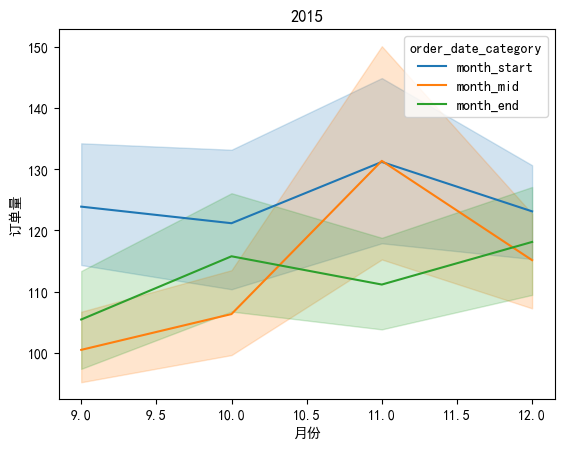

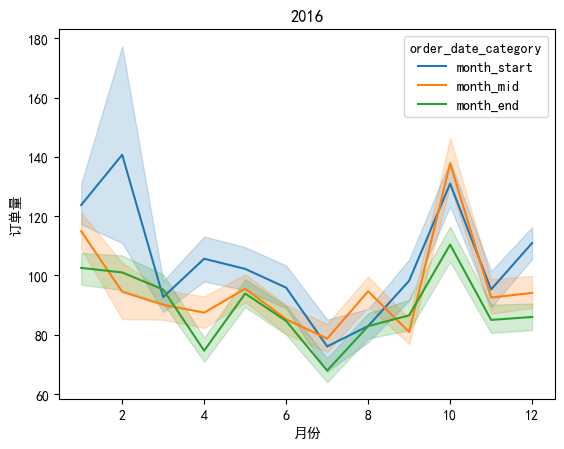

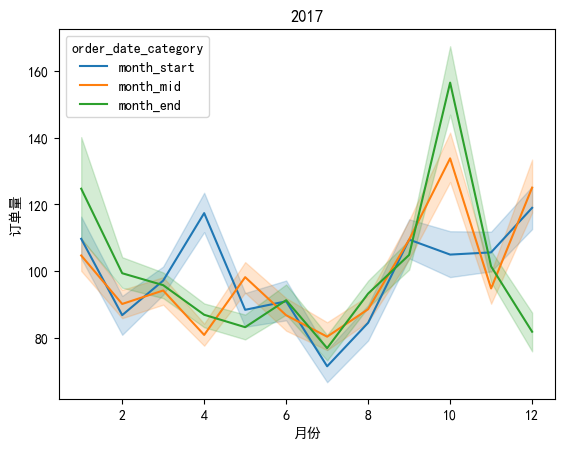

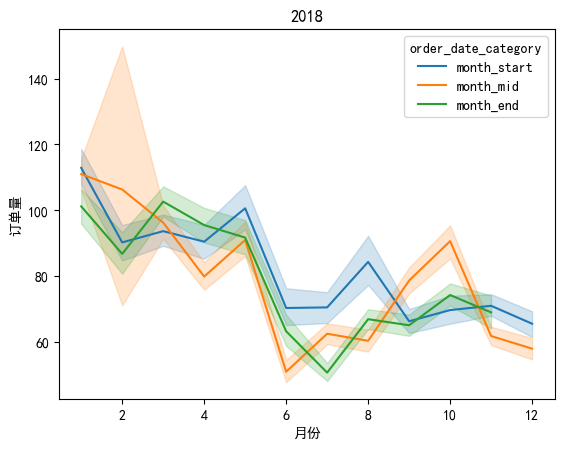

In [22]:
import seaborn as sns
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
plot = sns.lineplot(x=data_2015['order_date'].dt.month,y='ord_qty',hue='order_date_category',data=data_2015)
plot.set(xlabel='月份', ylabel='订单量',title='2015' )
plt.show()

plot = sns.lineplot(x=data_2016['order_date'].dt.month,y='ord_qty',hue='order_date_category',data=data_2016)
plot.set(xlabel='月份', ylabel='订单量',title='2016' )
plt.show()

plot = sns.lineplot(x=data_2017['order_date'].dt.month,y='ord_qty',hue='order_date_category',data=data_2017)
plot.set(xlabel='月份', ylabel='订单量',title='2017' )
plt.show()

plot = sns.lineplot(x=data_2018['order_date'].dt.month,y='ord_qty',hue='order_date_category',data=data_2018)
plot.set(xlabel='月份', ylabel='订单量',title='2018' )
plt.show()


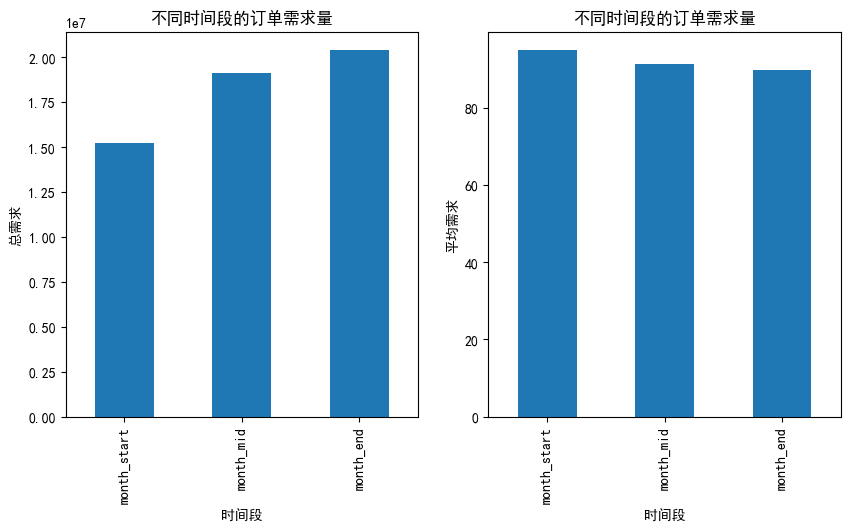

In [170]:
# 统计不同时间段的订单总需求量
demand_by_time = data.groupby('order_date_category')['ord_qty'].sum()
# 统计不同时间段的订单平均需求量
demand_by_time_mean = data.groupby('order_date_category')['ord_qty'].mean()

# 绘制不同时间段的订单需求量柱状图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

demand_by_time.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title("不同时间段的订单需求量")
ax1.set_ylabel("总需求")
ax1.set_xlabel("时间段")


demand_by_time_mean.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title("不同时间段的订单需求量")
ax2.set_ylabel("平均需求")
ax2.set_xlabel("时间段")
# Save the figure
plt.savefig('img/5.1.png', dpi=300)
plt.savefig('img/Mean_Demand.png', dpi=300)


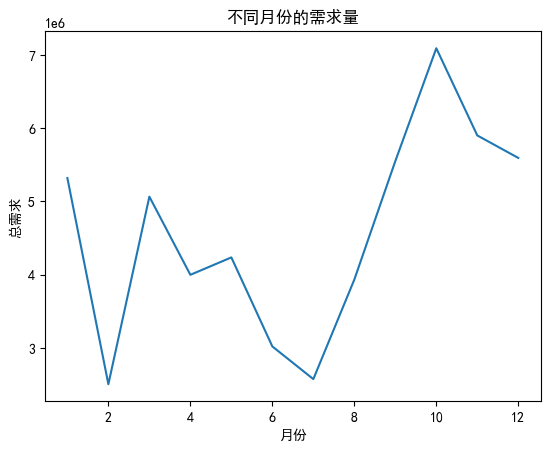

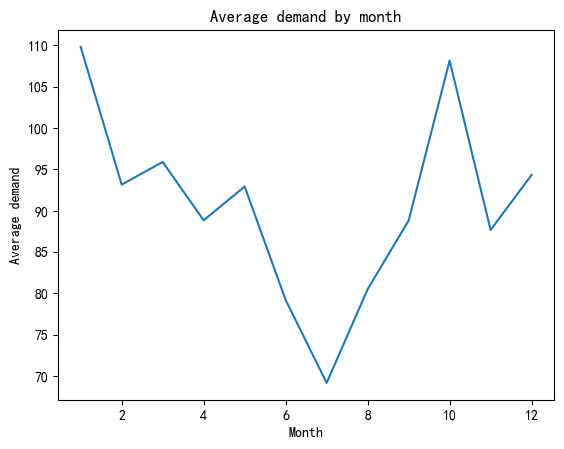

In [130]:
# 可以尝试将订单日期按照月份划分，然后对每个月份内的订单进行分析，以探究不同时间段对产品需求量的影响。首先，可以通过pandas中的groupby函数按照月份分组，并计算每个月份内订单的总需求量和平均需求量：
import pandas as pd
import matplotlib.pyplot as plt
# 读取数据
df = pd.read_csv('data/order_train2.csv')

# 将order_date转换成时间格式，并按照月份进行分组
df['order_date'] = pd.to_datetime(df['order_date'])
df['month'] = df['order_date'].dt.month
grouped = df.groupby('month')

# 计算每个月份内的订单总需求量和平均需求量
total_qty_by_month = grouped['ord_qty'].sum()
mean_qty_by_month = grouped['ord_qty'].mean()

# 绘制订单总需求量的折线图
plt.plot(total_qty_by_month.index, total_qty_by_month.values)
plt.title('不同月份的需求量')
plt.xlabel('月份')
plt.ylabel('总需求')
plt.savefig('img/22.png',dpi=300)
plt.show()

# 绘制订单平均需求量的折线图
plt.plot(mean_qty_by_month.index, mean_qty_by_month.values)
plt.title('Average demand by month')
plt.xlabel('Month')
plt.ylabel('Average demand')
plt.savefig('img/5.2.png',dpi=300)


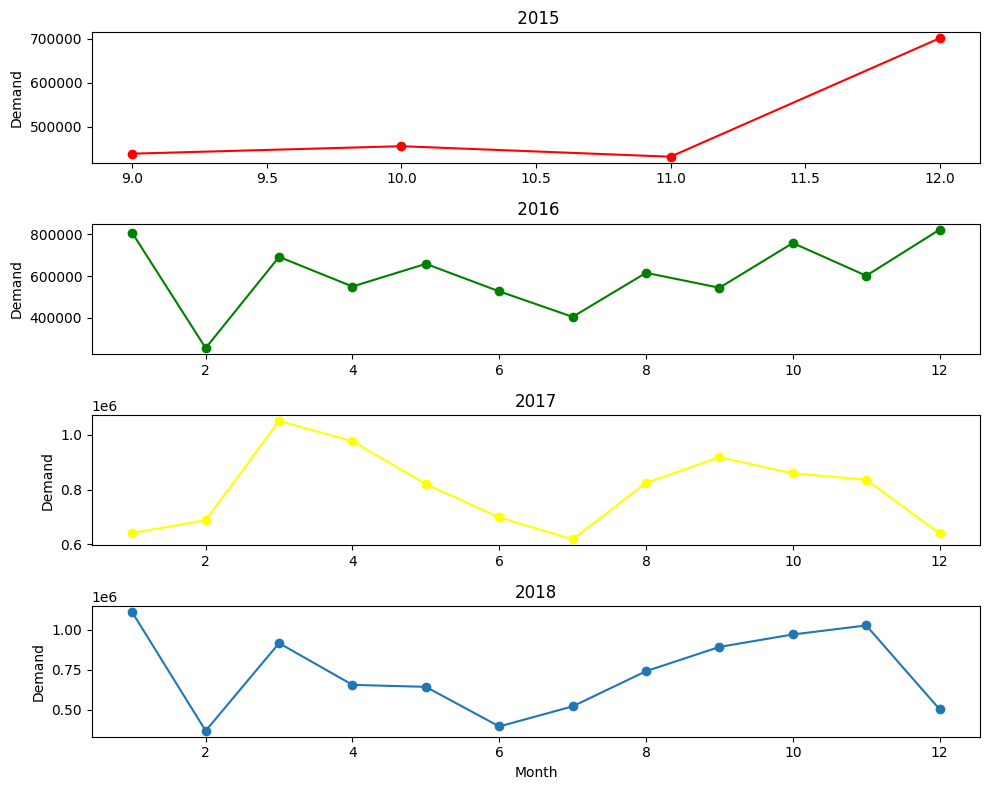

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
# 读取数据
data = pd.read_csv('data/order_train2.csv')

# 将日期列转换为时间序列
data['order_date'] = pd.to_datetime(data['order_date'])

# 根据年份和月份进行分组，并计算每个月的需求量  
monthly_demand = data.groupby([data['order_date'].dt.year, data['order_date'].dt.month])['ord_qty'].sum()

# 创建四个子图，分别表示2015、2016、2017、2018年每个月份的需求量
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 8))

ax[0].plot(monthly_demand.loc[2015], marker='o',color='red')
ax[0].set_ylabel('Demand')
ax[0].set_title(' 2015')

ax[1].plot(monthly_demand.loc[2016], marker='o',color = 'green')
ax[1].set_ylabel('Demand')
ax[1].set_title(' 2016')

ax[2].plot(monthly_demand.loc[2017], marker='o',color = 'yellow')
ax[2].set_ylabel('Demand')
ax[2].set_title('2017')

ax[3].plot(monthly_demand.loc[2018], marker='o')
ax[3].set_xlabel('Month')
ax[3].set_ylabel('Demand')
ax[3].set_title('2018')
# 调整子图之间的距离
plt.tight_layout()

# 保存并显示图像
plt.savefig('monthly_demand.png')

# （6）节假日对产品需求量的影响   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import holidays

# 加载数据集并进行数据预处理
df = pd.read_csv('data/order_train2.csv')
df['order_date'] = pd.to_datetime(df['order_date'])
df['is_holiday'] = df['order_date'].isin(holidays.China(years=[2015,2016,2017,2018]))
df['is_holiday'] = df['is_holiday'].astype(int)

# 将数据集分成两部分：节假日数据和非节假日数据
holiday_df = df[df['is_holiday'] == 1]
non_holiday_df = df[df['is_holiday'] == 0]

#可以看出 两个分类的具体数据
print(holiday_df.describe())
print(non_holiday_df.describe())
print(df)

       sales_region_code     item_code  first_cate_code  second_cate_code  \
count        6351.000000   6351.000000      6351.000000       6351.000000   
mean          103.044717  20992.963785       304.943159        406.471894   
std             1.505544    595.909162         2.088230          3.055258   
min           101.000000  20002.000000       301.000000        401.000000   
25%           102.000000  20501.000000       303.000000        404.000000   
50%           103.000000  20955.000000       306.000000        407.000000   
75%           105.000000  21507.000000       306.000000        408.000000   
max           105.000000  22084.000000       308.000000        412.000000   

          item_price      ord_qty  is_holiday  
count    6351.000000  6351.000000      6351.0  
mean     1109.506366    92.255393         1.0  
std      3342.852122   197.710890         0.0  
min         4.010000     1.000000         1.0  
25%       591.000000    10.000000         1.0  
50%       896.0000

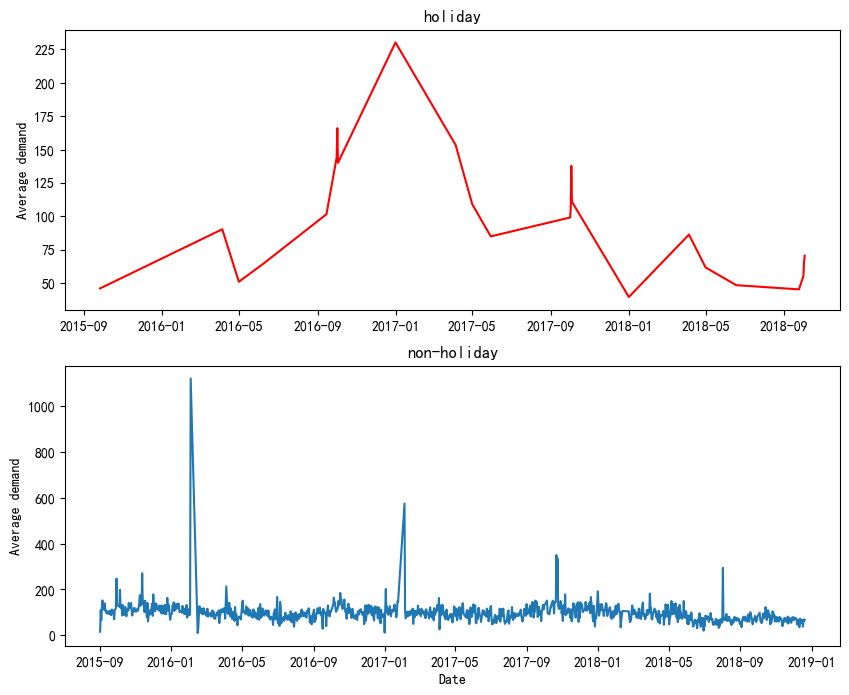

In [25]:
# 计算每天的平均需求量
holiday_demand = holiday_df.groupby(['order_date'])['ord_qty'].mean()
non_holiday_demand = non_holiday_df.groupby(['order_date'])['ord_qty'].mean()

# 可视化比较节假日和非节假日的平均需求量
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

ax[0].plot(holiday_demand.index, holiday_demand.values, color = 'red')
ax[1].plot(non_holiday_demand.index, non_holiday_demand.values)

ax[0].set_title('holiday')
ax[0].set_ylabel('Average demand')

ax[1].set_title('non-holiday')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Average demand')
plt.savefig('img/6.1.png',dpi=300)


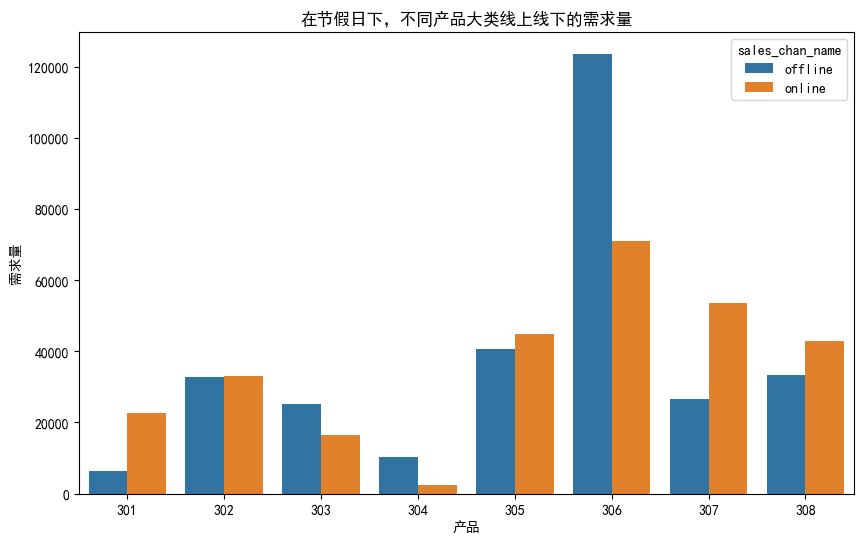

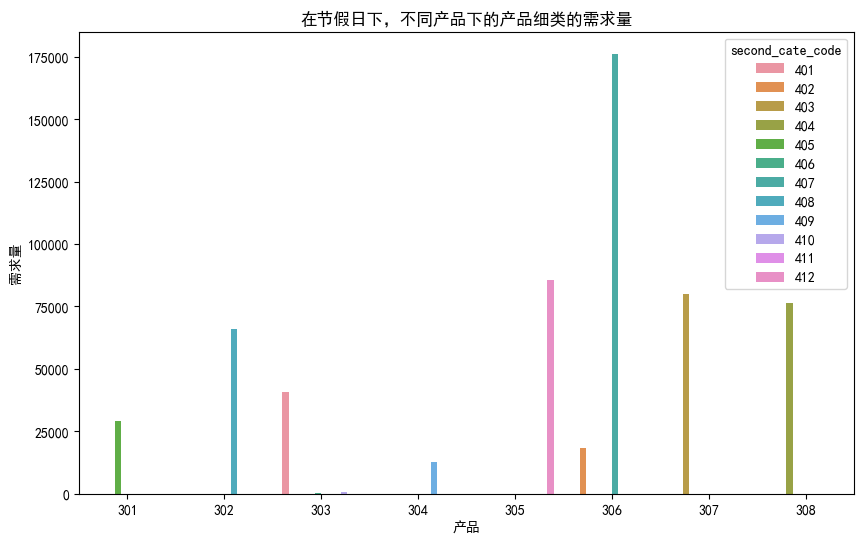

In [53]:
#在节假日下，不同产品大类线上线下的需求量
df = holiday_df.groupby(['first_cate_code','sales_chan_name'])['ord_qty'].sum().reset_index()
plt.figure(figsize=(10, 6)) 
sns.barplot(x='first_cate_code', y='ord_qty',hue='sales_chan_name' ,data=df)
plt.title("在节假日下，不同产品大类线上线下的需求量")
plt.xlabel("产品")
plt.ylabel("需求量")
plt.show()


df = holiday_df.groupby(['first_cate_code','second_cate_code'])['ord_qty'].sum().reset_index()
plt.figure(figsize=(10, 6)) 
sns.barplot(x='first_cate_code', y='ord_qty',hue='second_cate_code' ,data=df)
plt.title("在节假日下，不同产品下的产品细类的需求量")
plt.xlabel("产品")
plt.ylabel("需求量")
plt.show()


# （7）促销对产品需求量的影响
618、双十一  这些设置为促销日
可以通过统计分析节假日对需求量的影响，包括节假日前后的销售数据对比、节假日期间的销售数据变化等，探究节假日对需求量的影响程度；


Text(0, 0.5, '需求量')

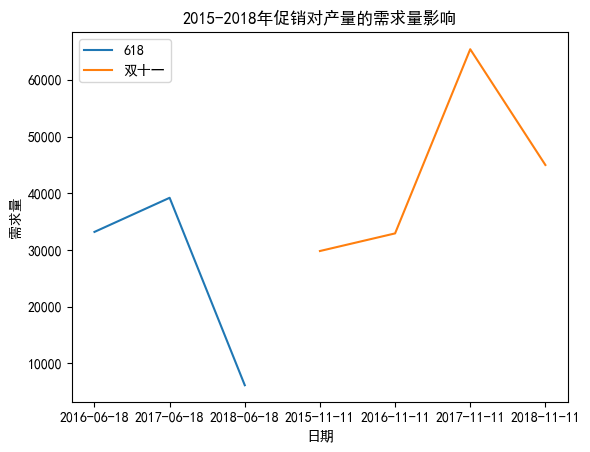

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据文件
data = pd.read_csv("data/order_train2.csv")

# 添加促销列
promotions = {
    "2015-06-18": "618",
    "2015-11-11": "双十一",
    "2016-06-18": "618",
    "2016-11-11": "双十一",
    "2017-06-18": "618",
    "2017-11-11": "双十一",
    "2018-06-18": "618",
    "2018-11-11": "双十一",
}
data["promotion"] = data["order_date"].apply(lambda x: promotions.get(x, "无"))

# 过滤指定日期范围内的数据
start_date = "2015-01-01"
end_date = "2018-12-31"
data = data[(data["order_date"] >= start_date) & (data["order_date"] <= end_date)]

# 按促销活动分组并计算平均需求量
grouped = data.groupby(["promotion", "order_date"])["ord_qty"].sum().reset_index()

# 只绘制618和双十一的需求量图
promotions = ["618", "双十一"]
for promotion in promotions:
    subset = grouped[grouped["promotion"] == promotion]
    plt.plot(subset["order_date"], subset["ord_qty"], label=promotion)

plt.legend()
plt.title("2015-2018年促销对产量的需求量影响")
plt.xlabel("日期")
plt.ylabel("需求量")


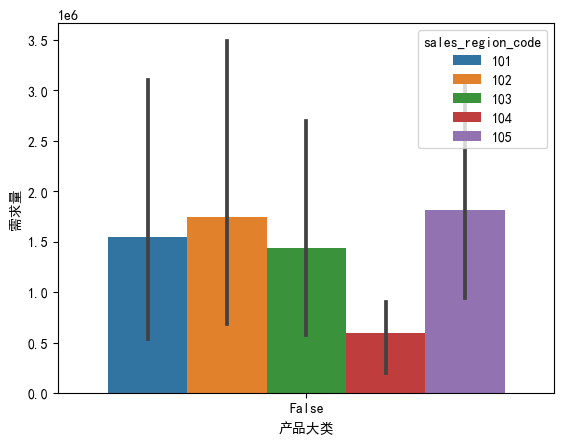

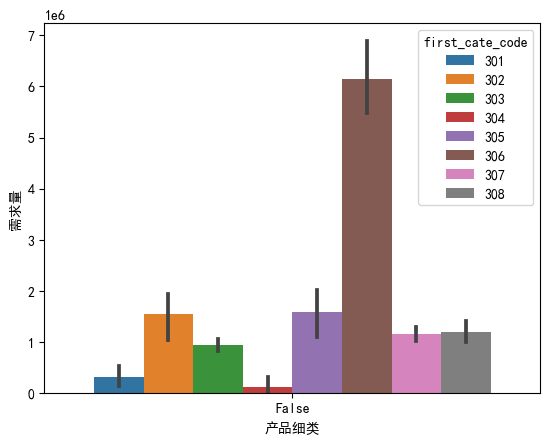

In [159]:
# 添加是否促销的标志
df['is_promotion'] = df['order_date'].apply(lambda x: x in [   
    "2015-06-18",
    "2015-11-11",
    "2016-06-18",
    "2016-11-11",
    "2017-06-18",
    "2017-11-11",
    "2018-06-18",
    "2018-11-11"]
                                           )
# 不同促销情况下的销售量
df_promotion = df.groupby(['is_promotion', 'sales_region_code', 'first_cate_code']).agg({'ord_qty': 'sum'}).reset_index()
sns.barplot(x='is_promotion', y='ord_qty', hue='sales_region_code', data=df_promotion)
plt.xlabel("产品大类")
plt.ylabel("需求量")
plt.show()
sns.barplot(x='is_promotion', y='ord_qty', hue='first_cate_code', data=df_promotion)
plt.xlabel("产品细类")
plt.ylabel("需求量")
plt.show()

In [58]:
#提取出是促销日的数据
#交叉验证  评估模型性能的常用方法
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

df = pd.read_csv('data/order_train2.csv', parse_dates=['order_date'], dtype={'ord_qty': int})

df.replace({"sales_chan_name":{'offline':0,'online':1}},inplace=True)

df['order_date'] = pd.to_datetime(df['order_date'], format='%y/%m/%d')
PROMO_DATES = ['2015-11-11', '2016-6-18', '2016-11-11', '2017-6-18', '2017-11-11', '2018-6-18','2018-11-11']
data = df[df['order_date'].isin(PROMO_DATES)]
data


# 特征选择
X = data[['sales_region_code', 'first_cate_code', 'second_cate_code', 'sales_chan_name','item_price']]
y = data['ord_qty']

# k折交叉验证
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=0)
mse_list = []
for train_index, test_index in kf.split(X):
    # 划分训练集和测试集
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]

    # 模型训练和预测
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 计算均方误差
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

# 输出交叉验证结果
print('均方误差：', mse_list)
print('平均误差：', np.mean(mse_list))
print('标准差：', np.std(mse_list))

均方误差： [3274.9135000607403, 2638.318503104907, 3286.0469465508963, 2778.166370480035, 3555.771572420002]
平均误差： 3106.6433785233157
标准差： 343.34878544269804


# （8）季节因素对产品需求量的影响

2015-09-01 00:00:00 2018-12-20 00:00:00
105    151628
102    144538
101    109935
103    101420
104     23096
Name: sales_region_code, dtype: int64
306    195196
302     86149
305     68863
303     59032
308     46939
307     45754
301     20385
304      8299
Name: first_cate_code, dtype: int64
offline    389692
online     140925
Name: sales_chan_name, dtype: int64


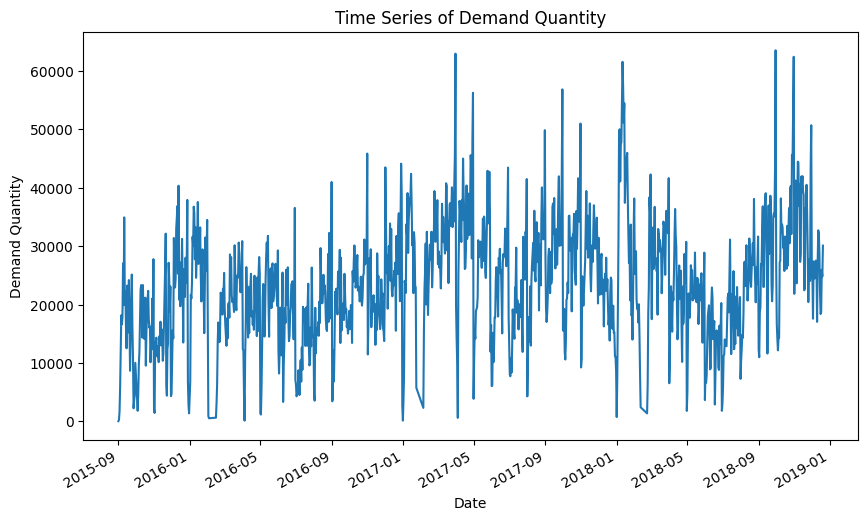

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

#对数据进行探索性数据分析
# 加载数据集
df = pd.read_csv('data/order_train2.csv', parse_dates=['order_date'],dtype={'ord_qty': int})


# 查看订单日期的范围
print(df['order_date'].min(), df['order_date'].max())

# 查看销售区域、产品大类、销售渠道等分类变量的分布情况
print(df['sales_region_code'].value_counts())
print(df['first_cate_code'].value_counts())
print(df['sales_chan_name'].value_counts())

# 绘制需求量的时间序列图
df.groupby('order_date')['ord_qty'].sum().plot(figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Demand Quantity')
plt.title('Time Series of Demand Quantity')
plt.savefig('img/8.1.png', dpi=300)


DatetimeIndex(['2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', name='order_date', freq='M')


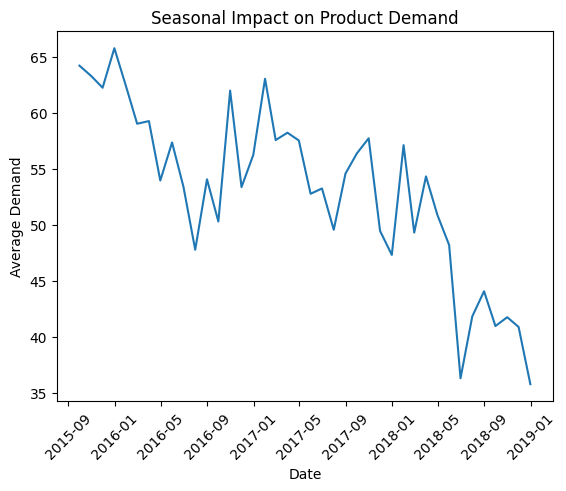

In [46]:
# 将order_date列设为时间索引
df['order_date'] = pd.to_datetime(df['order_date'])
df.set_index('order_date', inplace=True)

# 按月份计算订单需求量的平均值
monthly_mean_qty = df.resample('M')['ord_qty'].mean()
print(monthly_mean_qty.index)
# 绘制每个月的平均需求量曲线
plt.plot(monthly_mean_qty.index, monthly_mean_qty.values)
plt.xlabel('Date')
plt.ylabel('Average Demand')
plt.title('Seasonal Impact on Product Demand')

plt.xticks(rotation=45, fontsize=10) 
plt.savefig('img/8.2.png', dpi=300)


C:\Users\15119936719\AppData\Local\Temp\ipykernel_21332\3001786716.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["order_date"] = pd.to_datetime(df["order_date"])


    year season  ord_qty
0   2015     秋季   439444
1   2015     冬季  1590204
2   2016     春季  1753973
3   2016     夏季  1735710
4   2016     秋季  1564621
5   2016     冬季  2182771
6   2017     春季  2379394
7   2017     夏季  2494728
8   2017     秋季  2359794
9   2017     冬季  2334399
10  2018     春季  2396247
11  2018     夏季  1697095
12  2018     秋季  2157618
13  2018     冬季  2502588


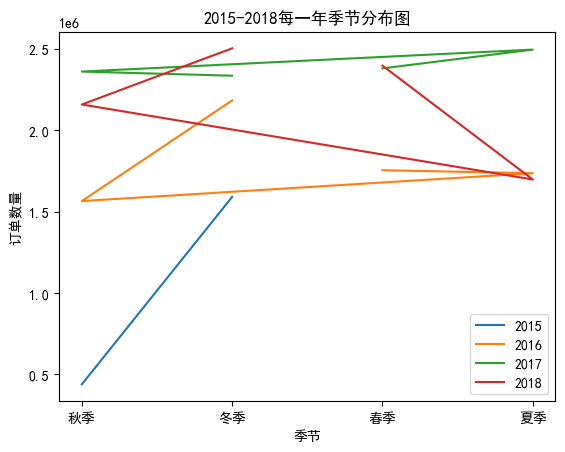

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
# 读取数据
data = pd.read_csv("data/order_train2.csv")

# 选取订单日期和订单数量列
df = data[["order_date", "ord_qty"]]

# 转换订单日期格式为时间戳格式
df["order_date"] = pd.to_datetime(df["order_date"])

# 按订单日期排序
df = df.sort_values(by="order_date")
# 添加年份和季节列
df["year"] = df["order_date"].dt.year
df["season"] = ((df["order_date"].dt.month-1)//3+1)

# 按年份和季节分组，计算订单数量的和
df_grouped = df.groupby(["year", "season"]).sum().reset_index()

# 将季节编码转换为季节名称
season_names = {1: "春季", 2: "夏季", 3: "秋季", 4: "冬季"}
df_grouped["season"] = df_grouped["season"].map(season_names)
# 按年份分组
df_year_grouped = df_grouped.groupby("year")

print(df_year_grouped.head())

# 绘制每一年的季节分布图
for year, group in df_year_grouped:
    plt.plot(group["season"], group["ord_qty"], label=year)

# 设置图标题、图例和坐标轴标签
plt.title("2015-2018每一年季节分布图")
plt.legend()
plt.xlabel("季节")
plt.ylabel("订单数量")

# 显示图像
plt.show()


Text(0.5, 1.0, '2015-2018年不同季节的总销售额')

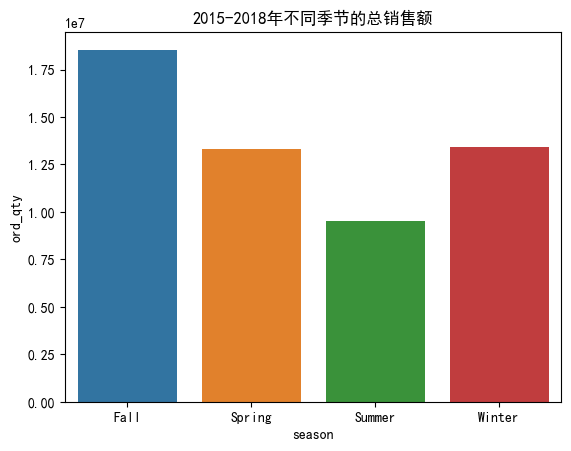

In [164]:
# 读取数据
df = pd.read_csv("data/order_train2.csv")
df['sales_amount'] = df['item_price'] * df['ord_qty']
df_sales = df.groupby(['order_date', 'sales_region_code', 'first_cate_code']).agg({'ord_qty': 'sum', 'sales_amount': 'sum'}).reset_index()
# 添加季节标签
def get_season(date):
    month = int(date.split('-')[1])
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['order_date'].apply(get_season)

# 分析不同季节的销售情况
df_season = df.groupby(['season']).agg({'ord_qty': 'sum', 'sales_amount': 'sum'}).reset_index()
sns.barplot(x='season', y='ord_qty', data=df_season)
plt.title('2015-2018年不同季节的总销售额')


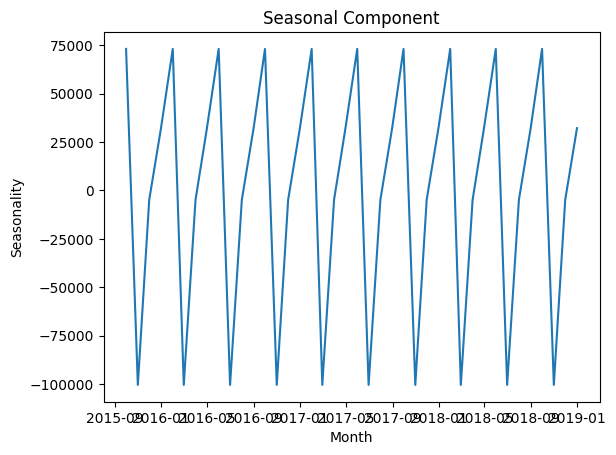

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 读取数据
data = pd.read_csv('data/order_train2.csv')

# 将日期数据转换成时间索引  
# seasonal_decompose函数将时间序列分解成趋势、季节性和随机性三个部分。最后，我们绘制分解后的季节性成分图，以便观察季节性变化。
data['order_date'] = pd.to_datetime(data['order_date'])
data.set_index('order_date', inplace=True)

# 按月份对订单需求量进行聚合
monthly_data = data['ord_qty'].resample('M').sum()

# 将时间序列分解成趋势、季节性和随机性三个部分
#周期应该设置为4
decomposition = seasonal_decompose(monthly_data, model='additive', period=4)

# 绘制分解后的季节性成分图
plt.plot(decomposition.seasonal)
plt.xlabel('Month')
plt.ylabel('Seasonality')
plt.title('Seasonal Component')
plt.show()


ARIMA模型进行需求量预测。在这之前，我们需要进行一些数据准备，包括分离训练集和测试集、对训练集进行平稳性检验和自相关性检验等。下面是具体步骤：

分离训练集和测试集：我们将数据按时间顺序划分为训练集和测试集。通常情况下，我们将80%的数据用于训练，剩下的20%用于测试。

平稳性检验：ARIMA模型要求时间序列数据是平稳的，即其均值和方差不随时间变化。我们可以使用ADF检验或KPSS检验来检验时间序列数据的平稳性。如果数据不平稳，我们需要对其进行差分操作，直到数据变为平稳序列。

自相关性检验：自相关性检验用于检验时间序列数据中是否存在序列相关性。我们可以使用ACF和PACF图来进行自相关性检验，通过观察图像可以确定ARIMA模型的参数。

In [4]:
# 分离训练集和测试集
train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]


In [5]:
# 平稳性检验
from statsmodels.tsa.stattools import adfuller, kpss

# ADF检验
def adf_test(timeseries):
    print('ADF检验结果：')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

# KPSS检验
def kpss_test(timeseries):
    print('KPSS检验结果：')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print(kpss_output)

# 对训练集进行平稳性检验
adf_test(train_data['ord_qty'])
kpss_test(train_data['ord_qty'])


ADF检验结果：


MemoryError: Unable to allocate 198. MiB for an array with shape (61, 424395) and data type float64

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 绘制自相关图和偏自相关图
def plot_acf_pacf(data):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
    plot_acf(data, ax=ax[0], lags=50)
    plot_pacf(data, ax=ax[1], lags=50)
    plt.show()

plot_acf_pacf(train_data['ord_qty'])
